In [1]:

from selenium import webdriver
from selenium.webdriver.common.by import By
import csv
driver = webdriver.Chrome()  # You need to have chromedriver installed and in your PATH

# URL of the website to scrape
url = 'https://ratings.fide.com/top_lists.phtml'

# Load the webpage
driver.get(url)
table = driver.find_element(By.XPATH, "//*[@id='div_output']/table/tbody")
rows = table.find_elements(By.TAG_NAME, "tr")
with open("sample.csv","w",newline="") as file:
    writer = csv.writer(file)
    for r in rows:
        data=r.find_elements(By.CSS_SELECTOR,"td,th")
        row_data=[]
        for d in data:
            row_data.append(d.text)
        writer.writerow(row_data)


driver.quit()


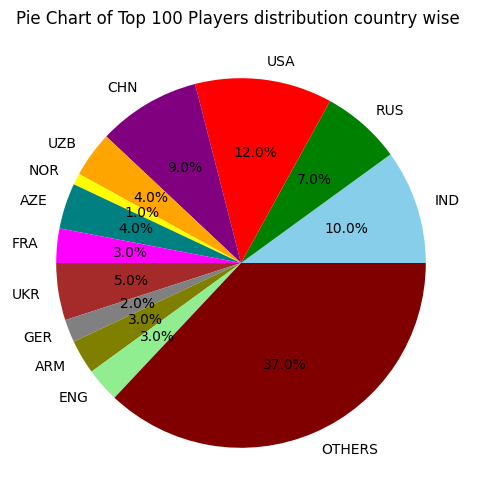

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("sample.csv", header=None, names=["Name", "Country", "Ratings", "+-", "Birth year", "Avg rt"])

# Prepare data for the pie chart
value_counts = df["Country"].value_counts()
pie_data = [value_counts['IND'], value_counts['RUS'], value_counts['USA'], value_counts['CHN'],value_counts['UZB'],value_counts['NOR'],value_counts['AZE'],value_counts['FRA'],value_counts['UKR'],value_counts['GER'],value_counts['ARM'],value_counts['ENG'],value_counts.sum()-value_counts['IND']- value_counts['RUS']- value_counts['USA']- value_counts['CHN']-value_counts['UZB']-value_counts['ENG']-value_counts['ARM']-value_counts['NOR']-value_counts['AZE']-value_counts['FRA']-value_counts['UKR']-value_counts['GER']]

pie_labels = ['IND', 'RUS', 'USA', 'CHN','UZB','NOR','AZE','FRA','UKR','GER','ARM','ENG', 'OTHERS']

colors = ['skyblue', 'green', 'red', 'purple', 'orange', 'yellow',
          'teal', 'fuchsia', 'brown', 'gray', 'olive', 'lightgreen',
          'maroon', 'lime']

# Create a pie chart using Matplotlib
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(pie_data, labels=pie_labels, autopct="%1.1f%%", colors=colors)  # Plot the pie chart
plt.title("Pie Chart of Top 100 Players distribution country wise ")
plt.show()


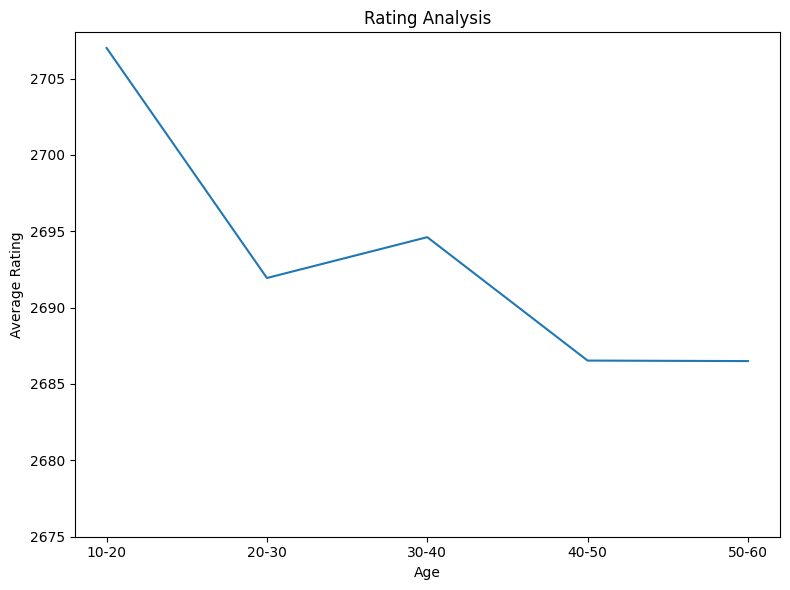

In [3]:
'''df["Age"] = 2024 - df["Birth year"]
avgrt = []
for i in range(1, 6):
    avgrt.append(df[(df["Age"] >= i*10) & (df["Age"] < (i+1)*10)]["Ratings"].mean())
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
bars = plt.bar(['10-20', '20-30', '30-40', '40-50', '50-60'], avgrt)  # Customize color as desired

plt.ylim(ymin=2600)

for bar, value in zip(bars, avgrt):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.5, str(round(value, 2)), ha='center', va='bottom')  # Adjust positioning as needed

plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.title('Rating Analysis')

plt.tight_layout()  # Adjust spacing to prevent overlapping elements (optional)
plt.show()'''
'''
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' (replace if different)

df["Age"] = 2024 - df["Birth year"]
avgrt = []
age_groups = ['10-20', '20-30', '30-40', '40-50', '50-60']  # Age group labels (assuming these were used for bars)

for i in range(1, 6):
  avgrt.append(df[(df["Age"] >= i*10) & (df["Age"] < (i+1)*10)]["Ratings"].mean())

plt.figure(figsize=(8, 6))  # Set the figure size (optional)
plt.plot(age_groups, avgrt)  # Replace plt.bar() with plt.plot() for line graph

plt.ylim(ymin=2675)  # Set y-axis limits (optional)

plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.title('Rating Analysis')

plt.tight_layout()  # Adjust spacing to prevent overlapping elements (optional)
plt.show()
'''
#for india top 100

from selenium import webdriver
from selenium.webdriver.common.by import By
import csv
driver = webdriver.Chrome()  # You need to have chromedriver installed and in your PATH

# URL of the website to scrape
url = 'https://ratings.fide.com/rankings.phtml?continent=0&country=IND&rating=standard&gender=&age1=0&age2=0&period=2024-04-01&period2=1'

# Load the webpage
driver.get(url)
table = driver.find_element(By.XPATH, "//*[@id='div_output']/table/tbody")
rows = table.find_elements(By.TAG_NAME, "tr")
with open("INDIATOP100.csv","w",newline="") as file:
    writer = csv.writer(file)
    for r in rows:
        data=r.find_elements(By.CSS_SELECTOR,"td,th")
        row_data=[]
        for d in data:
            row_data.append(d.text)
        writer.writerow(row_data)


driver.quit()



In [6]:
#for india 2019 top 100

from selenium import webdriver
from selenium.webdriver.common.by import By
import csv
driver = webdriver.Chrome()  # You need to have chromedriver installed and in your PATH

# URL of the website to scrape
url = 'https://ratings.fide.com/rankings.phtml?continent=0&country=IND&rating=standard&gender=&age1=0&age2=0&period=2019-04-01&period2=1'

# Load the webpage
driver.get(url)
table = driver.find_element(By.XPATH, "//*[@id='div_output']/table/tbody")
rows = table.find_elements(By.TAG_NAME, "tr")
with open("INDIA2019TOP100.csv","w",newline="") as file:
    writer = csv.writer(file)
    for r in rows:
        data=r.find_elements(By.CSS_SELECTOR,"td,th")
        row_data=[]
        for d in data:
            row_data.append(d.text)
        writer.writerow(row_data)


driver.quit()



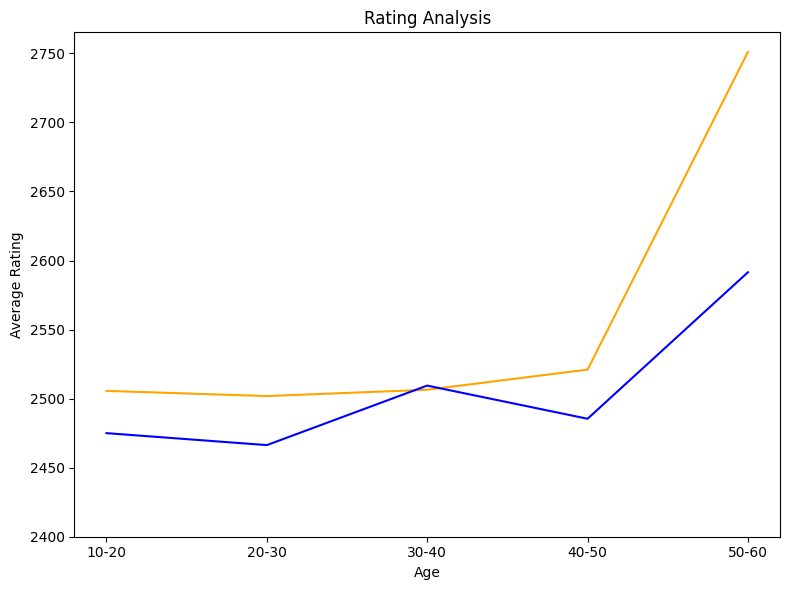

In [8]:
df1 = pd.read_csv("INDIATOP100.csv", header=None, names=["#", "Name", "Title", "Fed", "Ratings", "Birth year"])

df1["Age"] = 2024 - df1["Birth year"]
avgrt1 = []

df["Age"] = 2024 - df["Birth year"]
avgrt = []
age_groups = ['10-20', '20-30', '30-40', '40-50', '50-60']  # Age group labels (assuming these were used for bars)

df2 = pd.read_csv("INDIA2019TOP100.csv", header=None, names=["#", "Name", "Title", "Fed", "Ratings", "Birth year"])

df2["Age"] = 2024 - df2["Birth year"]
avgrt2=[]
for i in range(1, 6):
  avgrt2.append(df2[(df2["Age"] >= i*10) & (df2["Age"] < (i+1)*10)]["Ratings"].mean())

for i in range(1, 6):
  avgrt1.append(df1[(df1["Age"] >= i*10) & (df1["Age"] < (i+1)*10)]["Ratings"].mean())

plt.figure(figsize=(8, 6))  # Set the figure size (optional)
plt.plot(age_groups, avgrt1, color="orange")  # Replace plt.bar() with plt.plot() for line graph
plt.plot(age_groups, avgrt2, color = "blue")

plt.ylim(ymin=2400)  # Set y-axis limits (optional)

plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.title('Rating Analysis')

plt.tight_layout()  # Adjust spacing to prevent overlapping elements (optional)
plt.show()